In [1]:
# libraries
%load_ext autoreload
%autoreload 2

import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
import sys
%matplotlib inline

from PDM2PCM import *
from PCM2PDM import *
from Serialize import *
from PlotSuite import *

In [7]:
def swap_bytes_of_word(x):
    x = ((x & 0x000000FF) << 24) | ((x & 0xFF000000) >> 24) | ((x & 0x0000FF00) << 8) | ((x & 0x00FF0000) >> 8)
    return x

fname = "working_sine_wave_cross_testing_pdm_2_32bitsample_2000000hz"
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/data/"
fs_pdm = 2000000
os = 64

# np.set_printoptions(threshold=sys.maxsize, formatter={'int':hex})

data_pdm = np.fromfile(wd+fname, dtype=np.uint32)
swapped_bytes = swap_bytes_of_word(data_pdm)
byte_stream = swapped_bytes.view(dtype=np.uint8).ravel()
pdm_stream = np.unpackbits(byte_stream, axis=0).astype(np.int32)

In [8]:
fname = "sine_wave_cross_testing_pcm_44100khz"
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/data/"
fs_pcm = 44100
data_pcm, _ = sf.read( 
                        wd+fname, 
                        channels=1, 
                        samplerate=int(fs_pcm), 
                        format='RAW', 
                        endian='BIG', 
                        subtype='PCM_16', 
                        dtype=np.int16
                    )
data_pcm = data_pcm[int(2e5):int(2e5+2**16)]

In [ ]:
full_plot(data_pcm, fs_pcm, short=False, title='44100kHz PCM data - 10kHz sine wave')

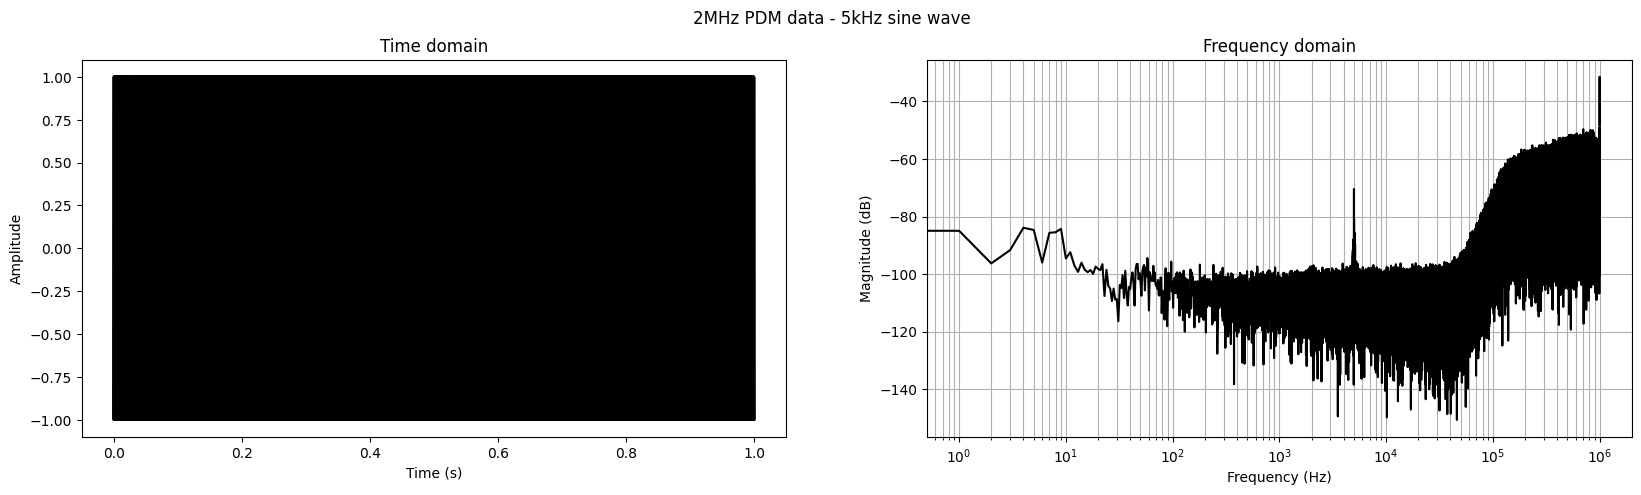

In [25]:
full_plot(2*pdm_stream[int(10e6):int(12e6)]-1, fs_pdm, short=False, title='2MHz PDM data - 5kHz sine wave')

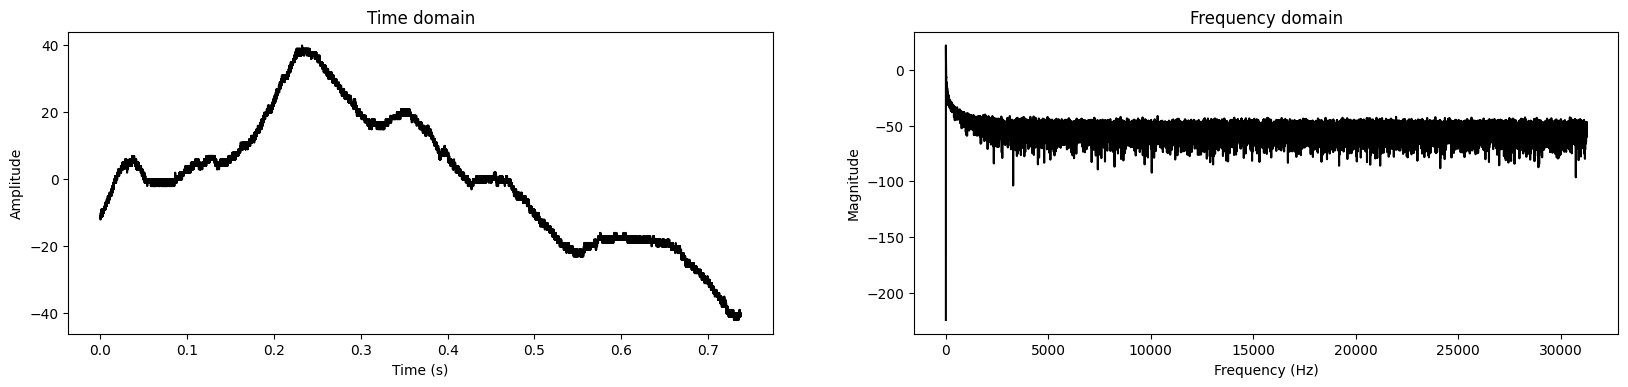

In [20]:
pdm2pcm = PDM2PCM(pdm_stream.astype(np.int32)[int(10e6):int(12e6)], fs_pdm=fs_pdm, os=32, stages=1, delay=2**14)
pdm2pcm.mag_plot()

In [14]:
sd.play(pdm2pcm.data_pcm, samplerate=fs_pdm/64)